In [1]:
# The aim of this code is to generate a set of outcomes used in the analysis of hukou reform determinants
# The set of outcomes is composed of 
# 1) policy scores disaggregated by policy areas, tools, targeted migrant categories, targeted city sizes
# 2) clustets assigned to each province according to various score combinations

# The data set used in this code is generated by the author based on original policy documents issued by each Chinese province

In [ ]:
import pandas as pd
import numpy as np

In [29]:
# 1. Read the data and assign weight to each row

policy = pd.read_excel("PolicyData.xlsx", index_col=0)
policy['score'] = policy['res_all'] * policy['mag_all']
policy = policy[policy['score'] < 5]

mig_weight = {10:1,20:0.73,21:0.63,22:0.63,23:0.11,30:0.56,31:0.45,32:0.11,33:0.11,40:0.01,41:0.01,42:0.01,
          50:1.00,51:0.73,52:0.17,53:0.1,54:0.17,61:0.11,62:0.63,63:0.01,64:0.01,65:0.01}

policy['weight'] = [mig_weight[i] for i in policy['mig_group']]
policy['wscore'] = policy['score'] * policy['weight']

In [53]:
# 2. Disaggregate policy scores by policy areas
    
def subset(data, col, v1, v2 = None, v3 = None, v4 = None, v5 = None):
    if v2 == None: 
        v2 = v1
    if v3 == None:
        v3 = v2
    return data.loc[(data[col] == v1) | (data[col] == v2) | (data[col] == v3) | (data[col] == v4) | (data[col] == v5), :]


def ts(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).sum()).rename(columns={col:name})


def avg(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).mean()).rename(columns={col:name})


def count(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).count()).rename(columns={col:name})

# 2.1 Policies targeting selection and integration area (scores and number of measures)

policy_sel = subset(policy, "pol_area", 1)
policy_int = subset(policy, "pol_area", 2)

ts_all = ts(policy, "score", "ts_all")
as_all = avg(policy, "score", "as_all")

ts_sel = ts(policy_sel, "score", "ts_sel")
as_sel = avg(policy_sel, "score", "as_sel")

wts_sel = ts(policy_sel, "wscore", "wts_sel")
was_sel = avg(policy_sel, "wscore", "was_sel")

ts_int = ts(policy_int, "score", "ts_int")
as_int = avg(policy_int, "score", "as_int")

num_ls = count(subset(policy_sel, "res_all", -1), "res_all", "num_ls")
num_li = count(subset(policy_int, "res_all", -1), "res_all", "num_li")

# 2.2 Policies targeting low-skilled migrants & high-skilled migrants specifically

policy_lsel = subset(policy_sel, "mig_group", 20, 21, 22, 30, 31)

lts_sel = ts(policy_lsel, "score", "lts_sel")
las_sel = avg(policy_lsel, "score", "las_sel")
wlts_sel = ts(policy_lsel, "wscore", "wlts_sel")
wlas_sel = avg(policy_lsel, "wscore", "wlas_sel")

policy_hsel = subset(policy_sel, "mig_group", 23, 32, 33)

hts_sel = ts(policy_hsel, "score", "hts_sel")
has_sel = avg(policy_hsel, "score", "has_sel")
whts_sel = ts(policy_hsel, "wscore", "whts_sel")
whas_sel = avg(policy_hsel, "wscore", "whas_sel")

# 2.3 Policies targeting cities of different size

policy_small = subset(policy_sel, "des", 11)

ts_small = ts(policy_small, "score", "ts_small")
as_small = avg(policy_small, "score", "as_small")

wts_small = ts(policy_small, "wscore", "wts_small")
was_small = avg(policy_small, "wscore", "was_small")


policy_medium = subset(policy_sel, "des", 12)

ts_medium = ts(policy_small, "score", "ts_medium")
as_medium = avg(policy_small, "score", "as_medium")

wts_medium = ts(policy_small, "wscore", "wts_medium")
was_medium = avg(policy_small, "wscore", "was_medium")


policy_big = subset(policy_sel, "des", 13, 14, 15)

ts_big = ts(policy_big, "score", "ts_big")
as_big = avg(policy_big, "score", "as_big")

wts_big = ts(policy_big, "wscore", "wts_big")
was_big = avg(policy_big, "wscore", "was_big")


policy_mega = subset(policy_sel, "des", 16)

ts_mega = ts(policy_mega, "score", "ts_mega")
as_mega = avg(policy_mega, "score", "as_mega")

wts_mega = ts(policy_mega, "wscore", "wts_mega")
was_mega = avg(policy_mega, "wscore", "was_mega")


policy_big_mega = subset(policy_sel, "des", 13, 14, 15, 16)

ts_big_mega = ts(policy_big_mega, "score", "ts_big_mega")
as_big_mega = avg(policy_big_mega, "score", "as_big_mega")

wts_big_mega = ts(policy_big_mega, "wscore", "wts_big_mega")
was_big_mega = avg(policy_big_mega, "wscore", "was_big_mega")

# 2.4 Policies using specific policy tools (strict definition - e.g., collective hukou cannot be considered as rp)

ts_lower = ts(subset(policy, "pol_tool", 11), "score", "ts_lower")
as_lower = avg(subset(policy, "pol_tool", 11), "score", "as_lower")

ts_ps = ts(subset(policy, "pol_tool", 12), "score", "ts_ps")
as_ps = avg(subset(policy, "pol_tool", 12), "score", "as_ps")

ts_rp = ts(subset(policy, "pol_tool", 21), "score", "ts_rp")
as_rp = avg(subset(policy, "pol_tool", 21), "score", "as_rp")

ts_unify = ts(subset(policy, "pol_tool", 23), "score", "ts_unify")
as_unify = avg(subset(policy, "pol_tool", 23), "score", "as_unify")

ts_edu = ts(subset(policy, "pol_tool", 31), "score", "ts_edu")
as_edu = avg(subset(policy, "pol_tool", 31), "score", "as_edu")


dep = pd.concat([ts_sel, as_sel, ts_int, as_int, num_ls, num_li,
                 wts_sel, was_sel, lts_sel, las_sel, wlts_sel, wlas_sel,
                 ts_small, ts_medium, ts_big, ts_mega, ts_big_mega, 
                 as_small, as_medium, as_big, as_mega, as_big_mega, 
                 wts_small, wts_medium, wts_big, wts_mega, wts_big_mega,
                 was_small, was_medium, was_big, was_mega, was_big_mega], axis=1).fillna(0)

In [64]:
# 3. Clustering analysis

import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn
from sklearn.cluster import AgglomerativeClustering, KMeans


# 3.1 Try different combinations

X0 = dep

X1 = dep.loc[:,["ts_int", "as_int", "lts_sel", "las_sel", 
                "ts_small", "ts_medium", "ts_big", "ts_mega",
                "as_small", "as_medium", "as_big", "as_mega"]]

X2 = dep.loc[:,['ts_int','as_int','lts_sel','las_sel','ts_sel','as_sel',
                "ts_small", "ts_medium", "ts_big", "ts_mega",
                "as_small", "as_medium", "as_big", "as_mega"]]

X3 = dep.loc[:,['ts_int','as_int','lts_sel','las_sel','ts_sel','as_sel',
                "ts_small", "ts_medium", "ts_big_mega",
                "as_small", "as_medium", "as_big_mega"]]

W1 = dep.loc[:,['ts_int','as_int','wlts_sel','wlas_sel',
                "wts_small", "wts_medium", "wts_big", "wts_mega",
                "was_small", "was_medium", "was_big", "was_mega"]]

W2 = dep.loc[:,['ts_int','as_int','wlts_sel','wlas_sel','wts_sel','was_sel',
                "wts_small", "wts_medium", "wts_big", "wts_mega",
                "was_small", "was_medium", "was_big", "was_mega"]]

W3 = dep.loc[:,['ts_int','as_int','wlts_sel','wlas_sel','wts_sel','was_sel',
                "wts_small", "wts_medium", "wts_big_mega",
                "was_small", "was_medium", "was_big_mega"]]

## X 和 W 最佳，X分3个，W分4个 

def clustering(X,n):
    clsmodel = AgglomerativeClustering(n_clusters=n, linkage='ward').fit(X)
    clusters = pd.DataFrame({'cluster':clsmodel.fit_predict(X)}, index = dep.index[:])

    return clusters

def plot_dendrogram(X,threshold):   
    plt.style.use('ggplot')
    %matplotlib notebook

    proname = {11:'Beijing',12:"Tianjin",13:'Hebei',14:'Shanxi',15:'Inner Mongolia',21:'Liaoning',22:'Jilin',23:'Heilongjiang',
              31:'Shanghai',32:'Jiangsu',33:'Zhejiang',34:'Anhui',35:'Fujian',36:'Jiangxi',37:'Shandong',41:'Henan',42:'Hubei',
               43:'Hunan',44:'Guangdong',45:'Guangxi',46:'Hainan',50:'Chongqing',51:'Sichuan',52:'Guizhou',53:'Yunnan',54:'Xizang',
              61:'Shaanxi',62:'Gansu',63:'Qinghai',65:'Xinjiang'}

    from scipy.cluster.hierarchy import ward, dendrogram
    plt.figure()
    dendrogram(ward(X), labels=[proname[province] for province in dep.index[:]], color_threshold=threshold)
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
    plt.subplots_adjust(bottom=0.26)
    plt.gca().tick_params(bottom=False,left=False)
    plt.show()

plot_dendrogram(X2,30)

<IPython.core.display.Javascript object>


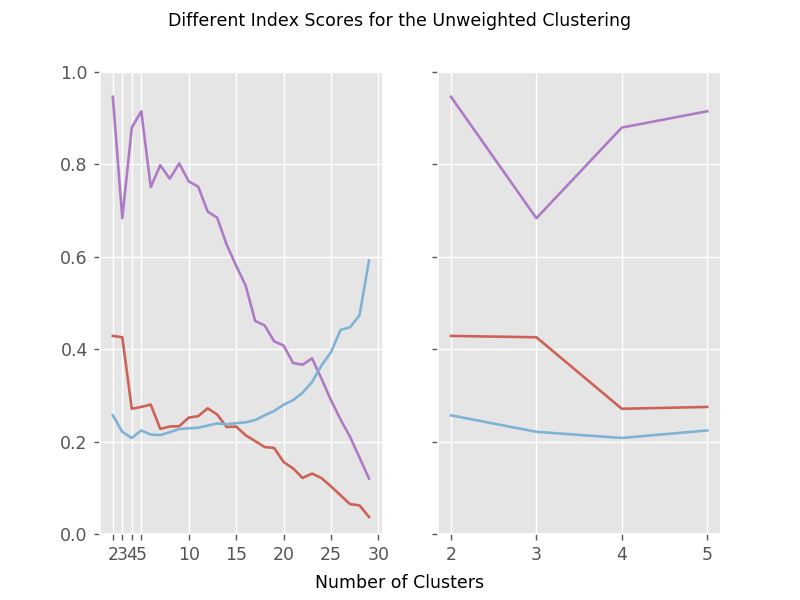

c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: Runtime

c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeW

c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeW

Text(0.5, 0.98, 'Different Index Scores for the Unweighted Clustering')

In [138]:
# 3.2 Choice of cluster number: validation statistic

from sklearn.metrics import silhouette_score as sh, calinski_harabaz_score as ch, davies_bouldin_score as db

def stat(X, alg_score, name = None):
    if alg_score == ch:
        scores = [0.01*(alg_score(X,clustering(X,i)['cluster'])) for i in range(2,30)]
    else:
        scores = [alg_score(X,clustering(X,i)['cluster']) for i in range(2,30)]
    
    #return pd.DataFrame({"No.of clusters":range(2,30), "Statistics":scores}) // For illustration purpose
    
    return scores


fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.plot(range(2,30), stat(X3, sh), color='#CD6155',label='Silhouette score')
ax1.plot(range(2,30), stat(X3, db), color='#AF7AC5', label='Davies Bouldin score')
ax1.plot(range(2,30), stat(X3, ch), color='#7FB3D5', label='Calinski haradaz score')

ax1.set_ylim([0,1.0])
ax1.set_xticks([2,3,4,5,10,15,20,25,30])

ax2.plot(range(2,6), stat(X3, sh)[:4], color='#CD6155',label='Silhouette score')
ax2.plot(range(2,6), stat(X3, db)[:4], color='#AF7AC5', label='Davies Bouldin score')
ax2.plot(range(2,6), stat(X3, ch)[:4], color='#7FB3D5', label='Calinski haradaz score')

ax2.set_xticks([2,3,4,5])


for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

fig.text(0.5,0.02,'Number of Clusters', ha='center',fontsize=10)
fig.subplots_adjust(bottom=0.11)
fig.suptitle('Different Index Scores for the Unweighted Clustering', fontsize=10)
#plt.legend(bbox_to_anchor=())